# Programming Exercise 3C: Multi-Compartment HH Model (Non-Mandatory, 4 Points)

In this additional, non-mandatory exercise, we implement the multi-compartment Hodgkin-Huxley model. It transfers the HH model to allow modelling of spatially extended structures. The model generalizes from a point neuron to a spatial one exactly like the linear model we considered in Programming Exercise 2. First of all, recall the equations that govern the conventional HH model:

$$
\begin{align}
	C_m \frac{\operatorname{d}V}{\operatorname{d}t}
		&=  I_e\left(t\right)  -\bar{g}_L \left( V -E_L\right) -\bar{g}_\text{Na} m^3 h \left( V -E_\text{Na}\right) 	-\bar{g}_\text{K} n^4 \left( V -E_\text{K}\right)
	\label{eq:HHModel}, \\
	\frac{\operatorname{d}m}{\operatorname{d}t}	
	&= \alpha_m \left( 1-m\right) -\beta_m m,\\
	\alpha_m
	&=\left\{
		\begin{array}{l l}
    			0.1 \frac{ V -25 }{1-\exp \left( - \frac{ V-25}{10} \right)},  & \quad V \neq 25mV\\
    			1, & \quad V = 25mV,\\
  		\end{array}
    	\right. \\    	
	\beta_m
	&= 4 \exp \left( - \frac{V}{18}\right), \\
	 \frac{\operatorname{d}h}{\operatorname{d}t}	
	 &= \alpha_h \left( 1-h\right) -\beta_h h, \\
 \alpha_h
 	&=  0.07 \exp \left( -\frac{V}{20} \right), \\
	  \beta_h
	  &= \frac{1}{1+ \exp \left( -\frac{V-30}{10}\right) },		\\
	\frac{\operatorname{d}n}{\operatorname{d}t}	
	&= \alpha_n \left( 1-n\right) -\beta_n n, \\
	\alpha_n 	&=\left\{
		\begin{array}{l l}
    			0.01 \frac{ V -10}{1-\exp \left( - \frac{ V-10}{10} \right)},  & \quad V \neq 10mV\\
    			0.1, & \quad V = 10mV,\\
  		\end{array}
    	\right. \\
	 \quad	\beta_n
	 &= 0.125 \exp \left( - \frac{V}{80}\right).
\end{align}
$$
These are the equations we already implemented in Programming Exercise 3B. To model multiple HH compartments, we need to account for current in axial direction; the first equation for a compartment $i$ becomes

$$
C_m \frac{\operatorname{d}V_i}{\operatorname{d}t}
		=  I_e\left(t\right)  -\bar{g}_L \left( V_i -E_L\right) -\bar{g}_\text{Na} m_i^3 h_i \left( V_i -E_\text{Na}\right) 	-\bar{g}_\text{K} n_i^4 \left( V_i -E_\text{K}\right) - g_\text{ax} (V_i - V_{i-1}) - g_\text{ax} (V_i - V_{i+1}).
$$
Note that each compartment also has it's own set of gating variables. The gating variables of a compartment behave independently of other compartment's gating variables. Within a compartment, the above formulas for the gating variables still hold.

We assume the same electrical properties as for the conventional (point neuron) HH model:
<ul>
<li>$C_m = 1 \mu F $, membrane capacitance,</li>

<li>$E_\text{Na} = 115 mV$, sodium equilibrium potential,</li>

<li>$E_\text{K} = -12 mV$, potassium equilibrium potential,</li>

<li>$E_\text{L} = 10.6 mV$, leak equilibrium potential,</li>

<li>$V\left(0\right)=0mV$, (starting) membrane resting potential assumed to be equal in all compartments,</li>

<li>$\bar{g}_\text{Na} = 120  mS$, maximum conductance for sodium channel,</li>

<li>$\bar{g}_\text{K} = 36  mS$, maximum conductance for potassium channel,</li>

<li>$\bar{g}_\text{L} = 0.3  mS$, maximum leak conductance.</li>
</ul>

In the implementation, we again drop all units and keep in mind that the equations measure the voltage in mV.

The spatial model has two additional parameters: The axial conductance $g_\text{ax}$ and the number of compartments $N$. We set $g_\text{ax} = 0.5 mS$ and $N=50$.

<div class="alert alert-block alert-success">
<b>Task:</b> Implement the missing model parameters.
    
<i>Hint:</i> Parts that were already implemented for the convenctional HH model are already implemented throughout the notebook.
</div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

C_m = 1 #uF
E_Na = 115 #mV
E_K = -12 #mV
E_L = 10.6 #mV
g_Na = 120 #mS
g_K = 36 #mS
g_L = 0.3 #mS

### YOUR CODE HERE ###

g_ax = 0.5 #mS
N = 50

### YOUR CODE HERE ###

V_0 = np.zeros(N)

The equations governing the gating particles within a given cell are already implemented.

In [2]:
alpha_m = lambda V : 1 if V == 25 else 0.1 * (V - 25) / (1 - np.exp(- (V - 25) / 10))
beta_m = lambda V : 4 * np.exp(- V / 18)
dm_dt = lambda m, V : alpha_m(V) * (1 - m) - beta_m(V) * m

alpha_h = lambda V : 0.07 * np.exp(- V / 20)
beta_h = lambda V : 1 / (1 + np.exp(- (V - 30) / 10))
dh_dt = lambda h, V : alpha_h(V) * (1 - h) - beta_h(V) * h

alpha_n = lambda V : 0.1 if V == 10 else 0.01 * (V - 10) / (1 - np.exp(- (V - 10) / 10))
beta_n = lambda V : 0.125 * np.exp(- V / 80)
dn_dt = lambda n, V : alpha_n(V) * (1 - n) - beta_n(V) * n


m_inf = lambda V : alpha_m(V) / (alpha_m(V) + beta_m(V))
h_inf = lambda V : alpha_h(V) / (alpha_h(V) + beta_h(V))
n_inf = lambda V : alpha_n(V) / (alpha_n(V) + beta_n(V))

<div class="alert alert-block alert-success">
<b>Task:</b> Complete the function to compute the voltage derivative in a given compartment.
    
<i>Hint:</i> You only need to change the function you wrote for the conventional HH slightly. Keep in mind that we have additional parameters!
</div>

In [3]:
def dV_dt_surrounded(V, V_left, V_right, I_e, C_m, E_L, E_Na, E_K, g_L, g_Na, g_K, g_ax, m, h, n):
    ''' Implements the voltage derivative for a "surrounded" compartment.
    Args:
        V: Current membrane potential in mV
        V_left: Current membrane potential at the compartment to the left in mV
        V_right: Current membrane potential at the compartment to the right in mV
        I_e: Current current input into the compartment in uA
        C_m: Membrane capacitance in uF
        E_L: Leak equilibrium potential in mV
        E_Na: Na equilibrium potential in mV
        E_K: K equilibrium potential in mV
        g_L: Maximum leak conductance in mS
        g_Na:Maximum Na conductance in mS
        g_K: Maximum K conductance in mS
        g_ax: Axial conductance in mS
        m: Current value for m
        h: Current value for h
        n: Current value for n

    Returns: Derivative of the voltage
    '''

    ### YOUR CODE HERE ###
    
    dV = (I_e - g_L * (V - E_L) - g_Na * (m ** 3) * h *(V - E_Na) - g_K * (n ** 4) * (V - E_K) ) \
    - g_ax * (V - V_left) - g_ax * (V - V_right)
    
    dV /= C_m
    
    return dV

    ### YOUR CODE HERE ###

<div class="alert alert-block alert-success">
<b>Task:</b> Complete the function simulate_HH to approximate the voltage for given electrical properties, input current function and initial value using Euler's forward method. Assume that the left end is a sealed end, and the right end is a killed end.
    
<i>Hint:</i> Loop over time, then over space. In each surrounded compartment, use the values computed at the last time step to update your values for the voltage, and the gating variables. Keep in mind, that each compartment has it's own set of gating variables. You can implement the sealed end by setting the left-most compartment's voltage to the value of it's right-hand neighbour from the previous timestep to ensure that the spatial gradient is zero.
</div>

In [4]:
def simulate_HH(V_0, input_current_fun, input_current_params, t_start, t_stop, delta_t,
                C_m, E_L, E_Na, E_K, g_L, g_Na, g_K, g_ax):
    ''' Runs the HH simulation. The function should return the time axis over which the simulation was run, and the
    voltage at each of the time steps.
    Args:
        V_0: np.array of length N containing the starting (resting) voltage in each compartment
        input_current_fun: Name of the input current function
        input_current_params: List of arguments that the current input function takes after t
        t_start: Start time of the simulation in ms
        t_stop: End time of the simulation in ms
        delta_t: Euler step length in ms
        C_m: Membrane capacitance in uF
        E_L: Leak equilibrium potential in mV
        E_Na: Na equilibrium potential in mV
        E_K: K equilibrium potential in mV
        g_L: Maximum leak conductance in mS
        g_Na:Maximum Na conductance in mS
        g_K: Maximum K conductance in mS
        g_ax: Axial conductance in mS

    Returns: time axis, voltage axis in ms and mV
    '''
    
    ### YOUR CODE HERE ###
    N_compartments = len(V_0)
    time_axis = np.arange(t_start, t_stop, delta_t)
    sol = np.zeros((len(time_axis), N_compartments, 4))
    
    
    # Setting the initial state of the model
    sol[0,:,0] = V_0
    for compartment in range(N):
        sol[0,compartment,1] = m_inf(V_0[compartment])
        sol[0,compartment,2] = h_inf(V_0[compartment])
        sol[0,compartment,3] = n_inf(V_0[compartment])
    
    for i_time in range(1, len(time_axis)):
        for i_cpmt in range(N_compartments):
            
            # update gating variables first
            V, m, n, h = sol[i_time - 1, i_cpmt, :]
            dm = dm_dt(m, V)
            dn = dn_dt(n, V)
            dh = dh_dt(h, V)
            sol[i_time, i_cpmt, 1] = m + dm * delta_t
            sol[i_time, i_cpmt, 2] = n + dn * delta_t
            sol[i_time, i_cpmt, 3] = h + dh * delta_t
            
            # update non-border voltages
            if (i_cpmt > 0) and (i_cpmt < N_compartments - 1):
                
                # set known values for final difference scheme
                
                I_e = input_current_fun(time_axis[i_time], *input_current_params)[i_cpmt]
                V =       sol[i_time - 1, i_cpmt, 0]
                V_left =  sol[i_time - 1, i_cpmt - 1, 0]
                V_right = sol[i_time - 1, i_cpmt + 1, 0]
                # calcualate derivative
                dV = dV_dt_surrounded(V, V_left, V_right, I_e, C_m, E_L, E_Na, E_K, g_L, g_Na, g_K, g_ax, m, h, n)
                # update
                sol[i_time, i_cpmt, 0] = V + dV * delta_t

        # sealed compartment
        sol[i_time, 0, 0] = sol[i_time, 1, 0]
        
        # killed compartment
        sol[i_time, -1, 0] = 0
                
                
    ### YOUR CODE HERE ###
 
    return time_axis, sol[:,:,0]



We will study the voltage response to a rectangular input current of the form
$$
I_e(t) = 
\begin{cases}
0, & (t < t_e) \vee (t_s \leq t) \vee (j\neq j_e) \\
I_0, & (t_e \leq t < t_s) \wedge (j = j_e)
\end{cases}.
$$
The function is already implemented, but please make sure you understand the function's input and output.

In [5]:
def rectangular_input(t, I_0, t_e, t_s, j_e, N):
    '''Implements the rectangle-input function.
    Args:
        t: Time in miliseconds
        I_0: The value of the input current
        t_e: Start time in miliseconds
        t_s: Snd time in miliseconds
        j_e: Compartment in which the current is injected
        N: Number of compartments

    Returns:
        The input current at a given time
    '''

    ### YOUR CODE HERE ###
    
    current = np.zeros(N)
    if t >= t_e and  t < t_s:
        current[j_e] = I_0
    return current

    ### YOUR CODE HERE ###

To simulate the model, we need to specify the parameters of the input current. Set $t_e = 60ms$, $t_s = 260ms$, and $j_e = 14$. Note that $j_e$ is written in terms of Python's numbering, so the current is injected into the 15th compartment from the left. We consider values of the input current of $6\mu A$, $8\mu A$, $15\mu A$, $20\mu A$ for the input current $I_0$.

<div class="alert alert-block alert-success">
<b>Task:</b> Implement the parameters. Store the values for the input current in a list (remember to drop the units!)
</div>

In [7]:
t_start, t_stop, delta_t = 0, 500, 0.025 #ms

### YOUR CODE HERE ###

t_e, t_s = 60, 260 #ms
j_e = 14
I_0_list = [6, 8, 15, 20]

### YOUR CODE HERE ###

<div class="alert alert-block alert-success">
<b>Task:</b> Run the simulation of the multi-compartment HH model by calling your function simulate_HH for each of the four input currents. Plot the voltage response to the four inputs for the compartments $0$, $14$, $48$. Qualitatively summarize the findings.

<i>Hint:</i> Make three (sub)plots, each containing the response of one compartment to all inputs.
</div>

In [9]:
time = np.arange(t_start, t_stop, delta_t)

all_solutions = np.zeros((len(I_0_list), len(time), N))

### YOUR CODE HERE ###

for j in range(len(I_0_list)):
    _, all_solutions[j] = simulate_HH(V_0, rectangular_input, (I_0_list[j], t_e, t_s, j_e, N), t_start, t_stop, delta_t, \
                C_m, E_L, E_Na, E_K, g_L, g_Na, g_K, g_ax)
    
### YOUR CODE HERE ###

Text(0.5, 0, 'Time, ms')

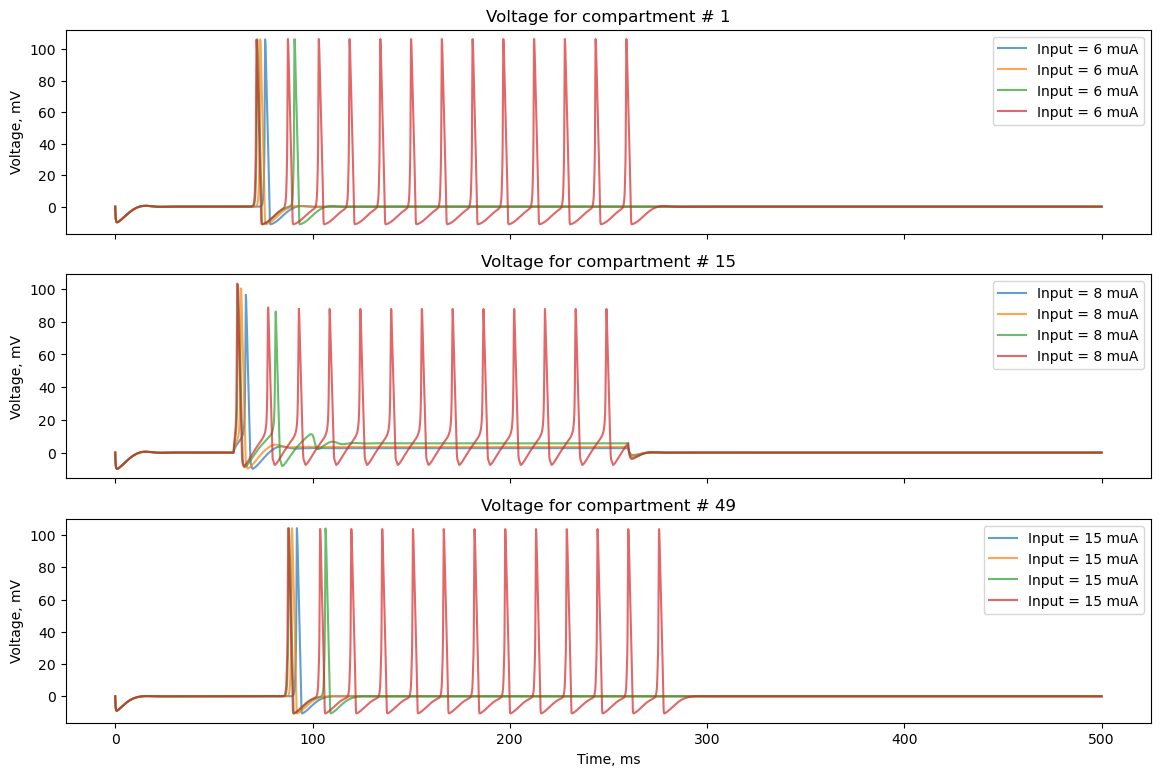

In [37]:
%matplotlib inline
plot_compartments = [0, 14, 48]

### YOUR CODE HERE ###

fig, axes = plt.subplots(3, 1, sharex=True, figsize=(14, 9))

for i, cpmt in enumerate(plot_compartments):
    ax = axes[i]
    ax.set_title(f"Voltage for compartment # {cpmt + 1}")
    for j in range(len(I_0_list)):
        V = all_solutions[j, :, cpmt]
        ax.plot(time, V, label=f"Input = {I_0_list[i]} muA", alpha=0.7)
    ax.legend()
    ax.set_ylabel("Voltage, mV")
ax.set_xlabel("Time, ms")


### YOUR CODE HERE ###

<b>Your answer</b>:  

- Each indivudal compartment behaves like (almost normal) HH neuron apart from lack of the amplitude adaptation
- Input compartment is exactly like it
- The response on the compartments close to borders is delayed accordingly
- The shape of a spike seems to be changed (the accumulation phase derivative seems to be lower in extreme compartments)

<div class="alert alert-block alert-success">
<b>Task:</b> Finally, create 3D plots to visualize the time- and space dependent voltage response. To make use of interactive plotting, create each plot in it's own cell.
</div>

Input current =  6


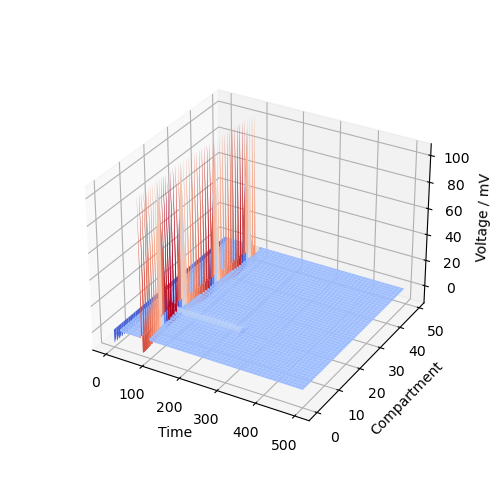

In [10]:
%matplotlib widget
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(projection='3d')
X, Y = np.meshgrid(time, range(N), indexing='ij')

idx = 0
print("Input current = ", I_0_list[idx])

### YOUR CODE HERE ###
ax.plot_surface(X, Y, all_solutions[idx], cmap = "coolwarm")
ax.set_xlabel('Time')
ax.set_ylabel('Compartment')
ax.set_zlabel('Voltage / mV')
plt.show()

### YOUR CODE HERE ###

Input current =  8


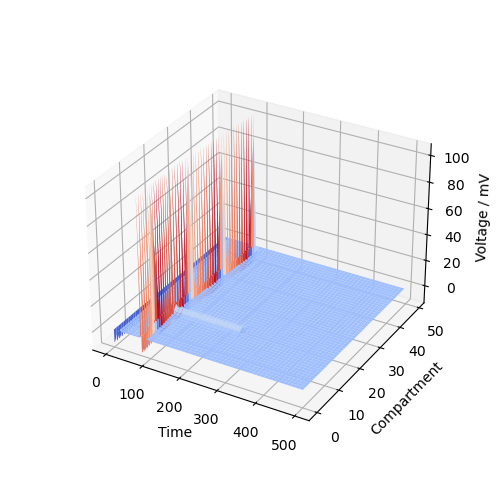

In [48]:
%matplotlib widget
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(projection='3d')
X, Y = np.meshgrid(time, range(N), indexing='ij')

idx = 1
print("Input current = ", I_0_list[idx])

### YOUR CODE HERE ###
ax.plot_surface(X, Y, all_solutions[idx], cmap = "coolwarm")
ax.set_xlabel('Time')
ax.set_ylabel('Compartment')
ax.set_zlabel('Voltage / mV')
plt.show()

### YOUR CODE HERE ###

Input current =  15


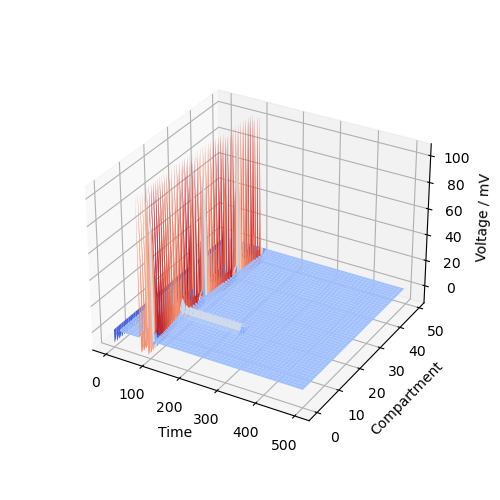

In [49]:
%matplotlib widget
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(projection='3d')
X, Y = np.meshgrid(time, range(N), indexing='ij')

idx = 2
print("Input current = ", I_0_list[idx])

### YOUR CODE HERE ###
ax.plot_surface(X, Y, all_solutions[idx], cmap = "coolwarm")
ax.set_xlabel('Time')
ax.set_ylabel('Compartment')
ax.set_zlabel('Voltage / mV')
plt.show()

### YOUR CODE HERE ###

Input current =  20


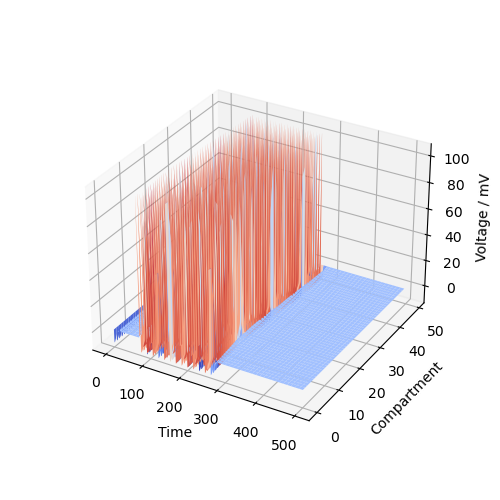

In [50]:
%matplotlib widget
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(projection='3d')
X, Y = np.meshgrid(time, range(N), indexing='ij')

idx = 3
print("Input current = ", I_0_list[idx])

### YOUR CODE HERE ###
ax.plot_surface(X, Y, all_solutions[idx], cmap = "coolwarm")
ax.set_xlabel('Time')
ax.set_ylabel('Compartment')
ax.set_zlabel('Voltage / mV')
plt.show()

### YOUR CODE HERE ###

*Sorry I was very sleepy... Wish you a nice day!*